# Statistical Thinking in Python (P1)

After all of the hard work of acquiring data and getting them into a form you can work with, you ultimately want to make clear, succinct conclusions from them. This crucial last step of a data analysis pipeline hinges on the principles of statistical inference. In this course, you will start building the foundation you need to think statistically, speak the language of your data, and understand what your data is telling you. The foundations of statistical thinking took decades to build, but can be grasped much faster today with the help of computers. With the power of Python-based tools, you will rapidly get up-to-speed and begin thinking statistically by the end of this course.



## Graphical exploratory data analysis

Before diving into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data.

### Plotting a histogram of iris data
For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use sns.set(), where sns is the alias that seaborn is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array versicolor_petal_length.

In the video, Justin plotted the histograms by using the pandas library and indexing the DataFrame to extract the desired column. Here, however, you only need to use the provided NumPy array. Also, Justin assigned his plotting statements (except for plt.show()) to the dummy variable _. This is to prevent unnecessary output from being displayed. It is not required for your solutions to these exercises, however it is good practice to use it. Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a ; after your plotting statements to achieve the same effect. Justin prefers using _. Therefore, you will see it used in the solution code.

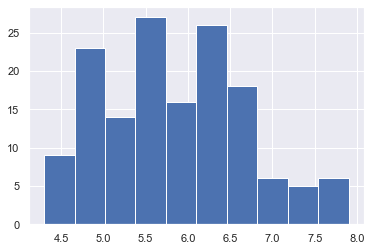

In [26]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

versicolor_petal_length = iris.data[:, :1]

# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

### Axis labels!
In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using plt.xlabel() and plt.ylabel(). Don't forget to add units and assign both statements to _. The packages matplotlib.pyplot and seaborn are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.

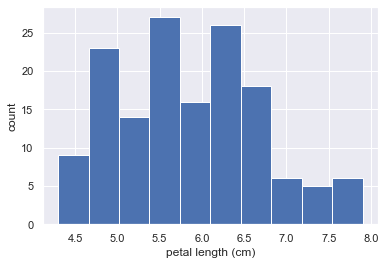

In [12]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()


### Adjusting the number of bins in a histogram
The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist().

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, versicolor_petal_length, is already in your namespace.

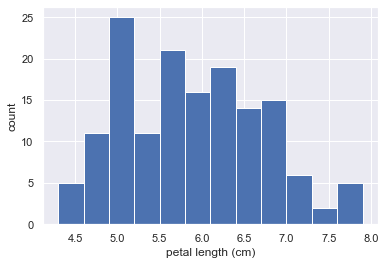

In [13]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins = n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')


### Bee swarm plot
Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as df.

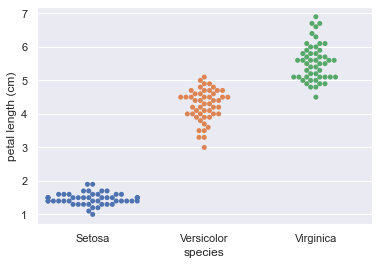

In [18]:
import pandas as pd
iris = pd.read_csv('iris.csv')

# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = 'variety', y ='petal.length', data = iris)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### Computing the ECDF
In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis.

In [22]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


### Plotting the ECDF
You will now use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to unpack them.

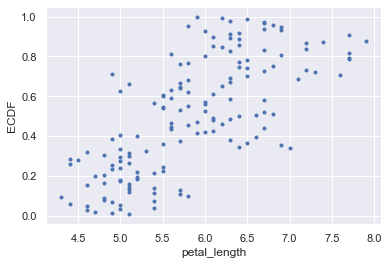

In [23]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers,marker = '.',linestyle = 'none')

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('petal_length')

# Display the plot
plt.show()


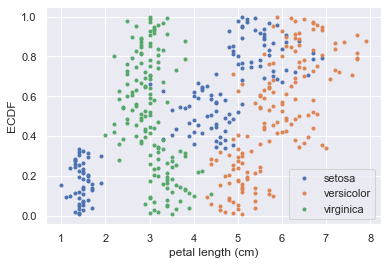

In [27]:
iris = datasets.load_iris()
versicolor_petal_length = iris.data[:, :1]
virginica_petal_length = iris.data[:, 1:2]
setosa_petal_length = iris.data[:,2:3]

# Compute ECDFs
x_set,  y_set  = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)
# Plot all ECDFs on the same plot
_= plt.plot(x_set,y_set, marker = '.', linestyle = 'none')
_= plt.plot(x_vers,y_vers, marker = '.', linestyle = 'none')
_= plt.plot(x_virg,y_virg, marker = '.', linestyle = 'none')
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()